<strong> lorsque vous avez un déséquilibre entre les classes (beaucoup plus de transactions normales que frauduleuses dans votre cas), il est recommandé de diviser les données de manière stratifiée, en veillant à ce que les proportions des classes soient maintenues dans les ensembles d'entraînement et de test. Cela évite que l'un des ensembles ait un déséquilibre beaucoup plus important que l'autre.
</strong>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('non_equilibres_data.csv')


In [3]:
#faire une copie 
data = dataset.copy()

In [4]:
# d'abord nous voulons mélanger le dataset en fonction de la colonne 'isFraud' utilisant sort_values()
# La méthode sort_values() est une fonctionnalité existe sur Pandas.
# Elle est utilisée pour trier un DataFrame ou une série en fonction des valeurs d'une ou plusieurs colonnes.

In [5]:
data.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,1,0.0,0,0
1,1,1864.28,21249.0,1,0.0,0,0
2,2,181.00,181.0,0,0.0,1,0
3,3,181.00,181.0,0,21182.0,1,0
4,1,11668.14,41554.0,1,0.0,0,0


In [6]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [7]:
import pandas as pd

# Sélectionner les lignes frauduleuses et normales
fraudulent = data[data['isFraud'] == 1]
normal = data[data['isFraud'] == 0]

# Obtenir les valeurs uniques dans la colonne 'type'
unique_types = normal['type'].unique()

# Créer un DataFrame vide pour stocker l'échantillon
sample_data = pd.DataFrame()

# Effectuer l'échantillonnage pour chaque type
for type_value in unique_types:
    type_data = normal[normal['type'] == type_value]
    sample_size = int(0.5 * len(type_data))  # Prendre 10% des données de chaque type
    sample = type_data.sample(n=sample_size, random_state=42)
    sample_data = pd.concat([sample_data, sample])

# Combiner les données échantillonnées avec les données frauduleuses
combined_data = pd.concat([fraudulent, sample_data])

# Mélanger les données pour garantir un ordre aléatoire
combined_data = combined_data.sample(frac=1, random_state=42)

# Maintenant, vous pouvez utiliser combined_data pour l'entraînement de votre modèle
# Assurez-vous d'utiliser les mêmes prétraitements que vous avez appliqués à l'ensemble de données complet


# l'Apprentissage Automatique :

In [8]:
# pip install xgboost


In [9]:
# pip install keras


In [10]:
# pip install tensorflow


Entraînement du modèle : Decision Tree
Temps d'entraînement : 19.35 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.09 secondes
Entraînement du modèle : Random Forest
Temps d'entraînement : 612.87 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 8.07 secondes
Entraînement du modèle : KNN
Temps d'entraînement : 16.43 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 39.13 secondes
Entraînement du modèle : Logistic Regression
Temps d'entraînement : 7.43 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.03 secondes


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Entraînement du modèle : XGBoost
Temps d'entraînement : 199.86 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.76 secondes
Modèle : Decision Tree
Exactitude : 1.00
F1-Score : 0.91
Précision : 0.90
Matrice de Confusion:
[[635038    352]
 [   288   1406]]


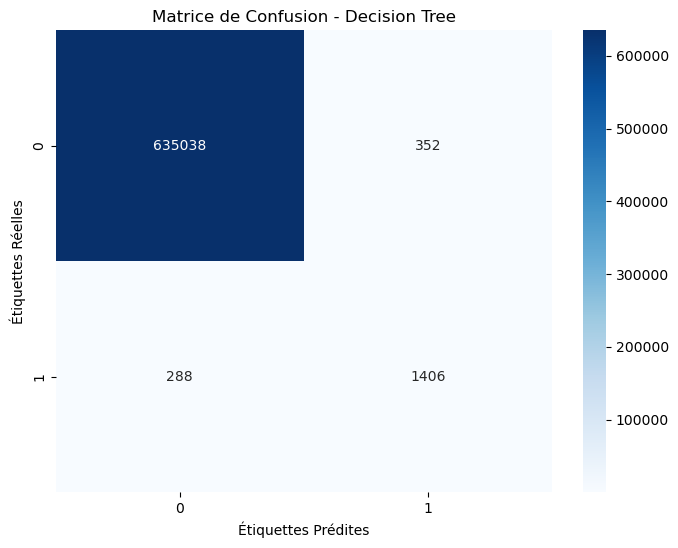

Modèle : Random Forest
Exactitude : 1.00
F1-Score : 0.92
Précision : 0.97
Matrice de Confusion:
[[635319     71]
 [   407   1287]]


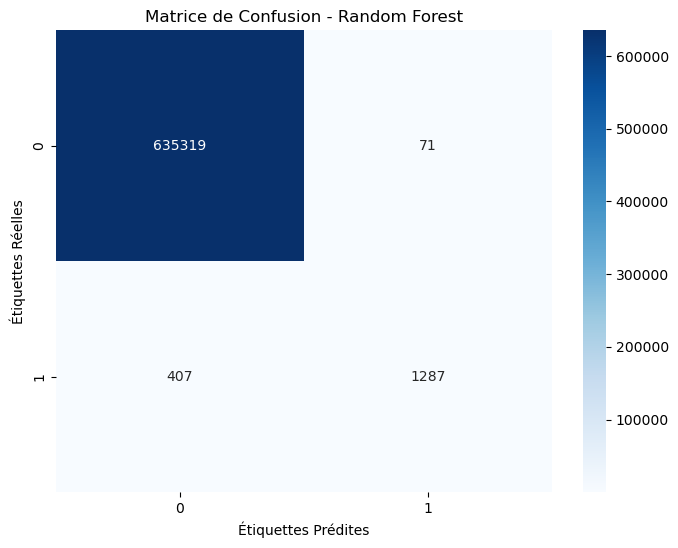

Modèle : KNN
Exactitude : 1.00
F1-Score : 0.89
Précision : 0.92
Matrice de Confusion:
[[635149    241]
 [   437   1257]]


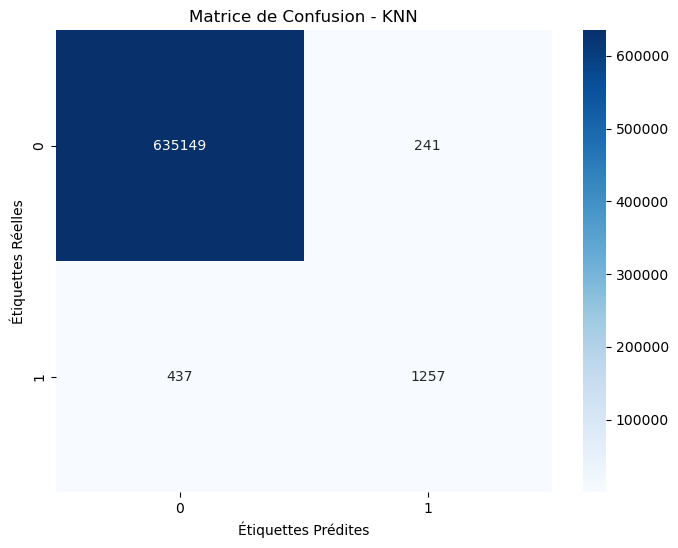

Modèle : Logistic Regression
Exactitude : 1.00
F1-Score : 0.50
Précision : 0.50
Matrice de Confusion:
[[635390      0]
 [  1694      0]]


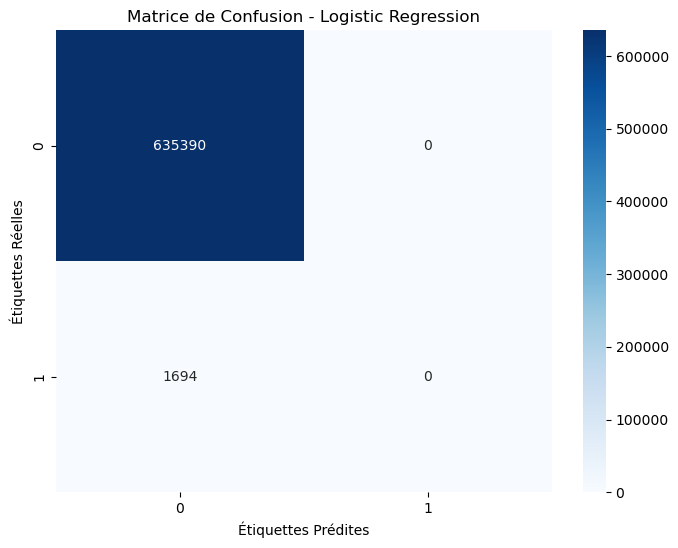

Modèle : XGBoost
Exactitude : 1.00
F1-Score : 0.92
Précision : 0.97
Matrice de Confusion:
[[635323     67]
 [   412   1282]]


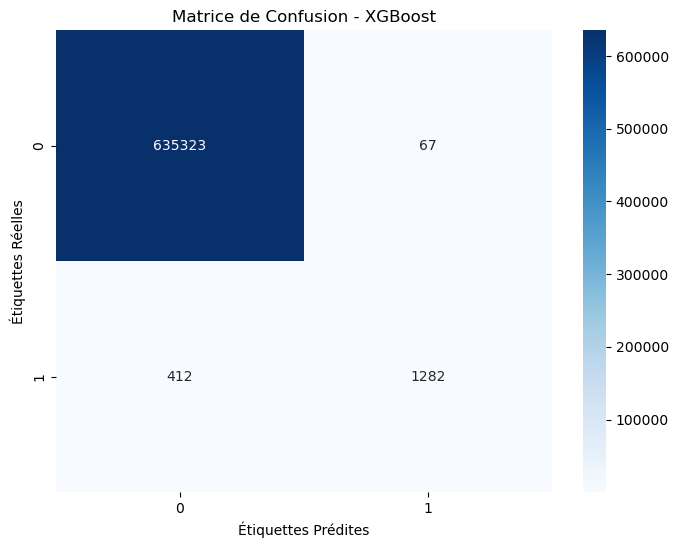

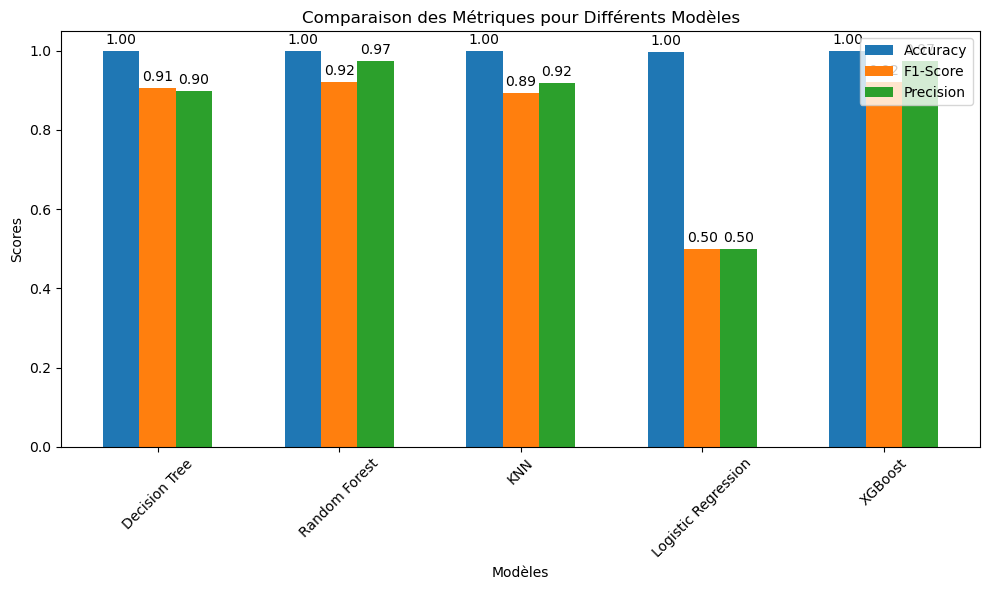

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time


# Features
x = combined_data.drop('isFraud', axis=1)

# Target
y = combined_data['isFraud']
# divisier (Split) nos données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Liste des modèles
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42))
]
# ... (chargement de vos données)

# Liste des modèles
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42))
]
# Entraîner et évaluer chaque modèle
results = []

for name, model in models:
    
    print(f"Entraînement du modèle : {name}")
    
    start_time = time.time()
    
    model.fit(x_train, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print("Entraînement terminé. Évaluation en cours...")
    
    start_time = time.time()
    
    y_pred = model.predict(x_test)
    
    end_time = time.time()
    testing_time = end_time - start_time
    
    print(f"Temps d'évaluation : {testing_time:.2f} secondes")
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append((name, accuracy, f1, precision, conf_matrix))
    print("==============================")

# Afficher les résultats et les matrices de confusion
for name, accuracy, f1, precision, conf_matrix in results:
    print(f"Modèle : {name}")
    print(f"Exactitude : {accuracy:.2f}")
    print(f"F1-Score : {f1:.2f}")
    print(f"Précision : {precision:.2f}")
    print("Matrice de Confusion:")
    print(conf_matrix)
    print("==============================")

    # Afficher une ligne de séparation
    print("=" * 30)
    
    # Afficher la matrice de confusion en utilisant Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Étiquettes Prédites')
    plt.ylabel('Étiquettes Réelles')
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()

# Collecter les métriques dans des listes séparées
names = [name for name, _, _, _, _ in results]
accuracies = [accuracy for _, accuracy, _, _, _ in results]
f1_scores = [f1 for _, _, f1, _, _ in results]
precision_scores = [precision for _, _, _, precision, _ in results]

# Créer un graphique en barres pour comparer les métriques
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(names))
width = 0.2

ax.bar(x, accuracies, width, label='Accuracy')
ax.bar([i + width for i in x], f1_scores, width, label='F1-Score')
ax.bar([i + 2 * width for i in x], precision_scores, width, label='Precision')

ax.set_xlabel('Modèles')
ax.set_ylabel('Scores')
ax.set_title('Comparaison des Métriques pour Différents Modèles')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(names, rotation=45)
ax.legend()

plt.tight_layout()

# Afficher les valeurs au-dessus des barres
for i, acc, f1, prec in zip(x, accuracies, f1_scores, precision_scores):
    ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')
    ax.text(i + width, f1 + 0.01, f'{f1:.2f}', ha='center', va='bottom')
    ax.text(i + 2 * width, prec + 0.01, f'{prec:.2f}', ha='center', va='bottom')

plt.show()